In [1]:
import pandas as pd
import os

raw_path = "../data/raw/"
all_data = []

for file in os.listdir(raw_path):
    if file.endswith(".csv"):
        year = ''.join([c for c in file if c.isdigit()]) or "unknown"
        df = pd.read_csv(os.path.join(raw_path, file))
        df["Year"] = year
        all_data.append(df)

final_df = pd.concat(all_data, ignore_index=True)
final_df.to_csv("../data/processed/nirf_combined.csv", index=False)

print("✅ Combined all years into one dataset!")

✅ Combined all years into one dataset!


✅ Combined all years: (601, 21)
✅ Model trained successfully!
R² Score: -0.01850647281085749
MAE: 7.647694554643139


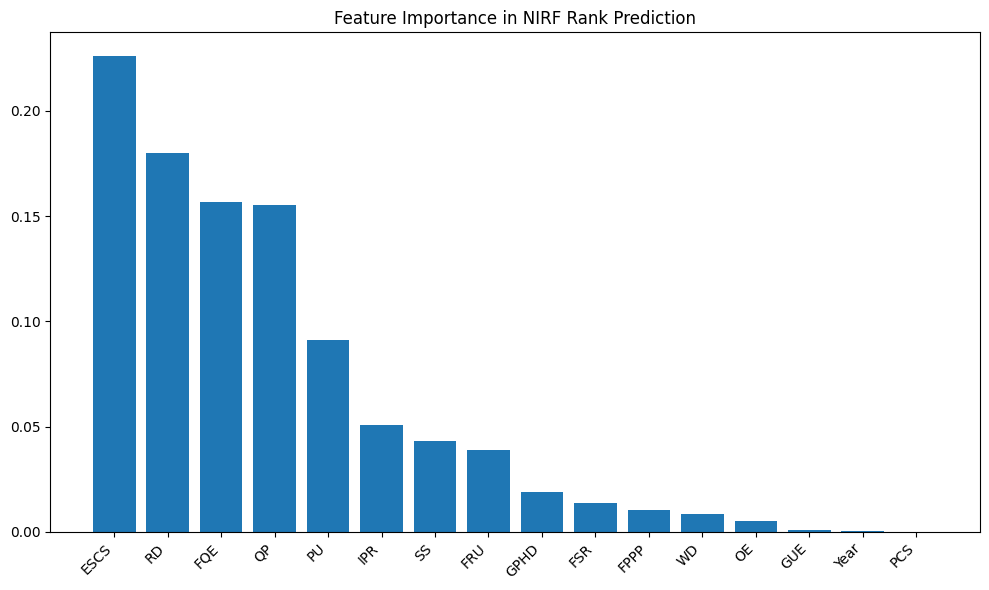

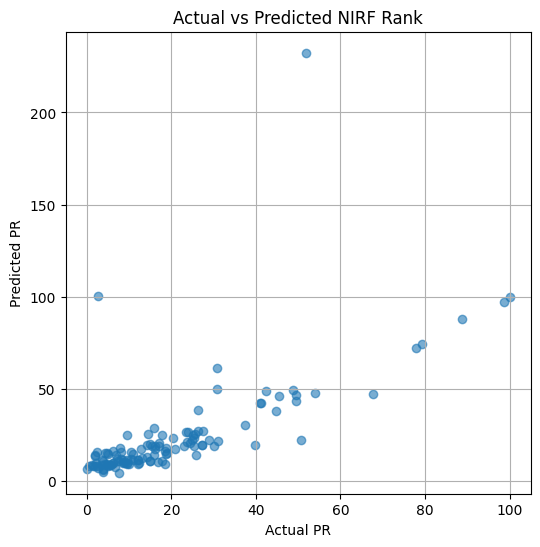

📊 Correlation with PR:
PR      1.000000
PU      0.167560
IPR     0.092297
SS      0.091364
GPHD    0.076491
OE      0.073082
RD      0.028946
FQE     0.028762
PCS     0.027719
ESCS    0.022503
FPPP    0.021137
GUE     0.020204
QP      0.018092
WD      0.006349
FRU    -0.009526
Year   -0.019764
FSR    -0.036869
Name: PR, dtype: float64


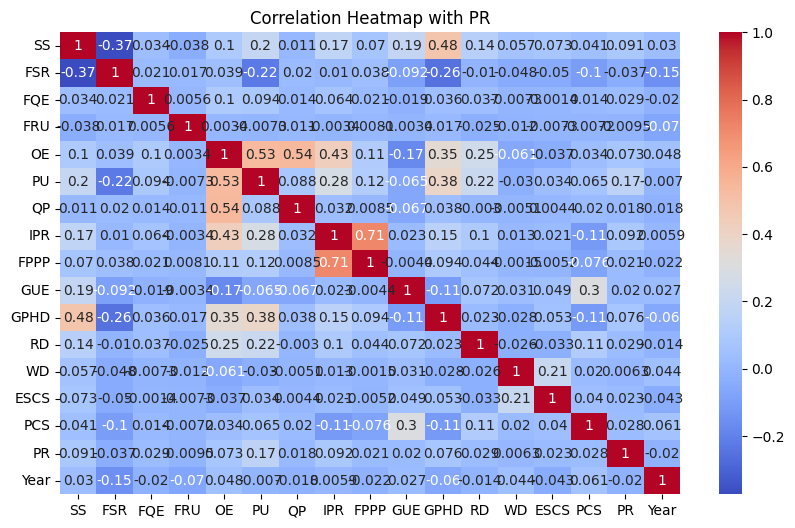

In [2]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------
# STEP 1: LOAD & MERGE DATA
# --------------------------
raw_path = "../data/raw/"
all_data = []

for file in os.listdir(raw_path):
    if file.endswith(".csv"):
        year = ''.join([c for c in file if c.isdigit()]) or "unknown"
        df = pd.read_csv(os.path.join(raw_path, file))
        df["Year"] = year
        all_data.append(df)

final_df = pd.concat(all_data, ignore_index=True)
print("✅ Combined all years:", final_df.shape)

# --------------------------
# STEP 2: CLEAN DATA
# --------------------------
# Drop non-numeric columns if present
drop_cols = [col for col in ["Institution Name", "Institution Code", "Institute Name", "Institute Code"] if col in final_df.columns]
final_df = final_df.drop(columns=drop_cols, errors='ignore')

# Convert PR & Year to numeric
final_df["PR"] = pd.to_numeric(final_df["PR"], errors="coerce")
final_df["Year"] = pd.to_numeric(final_df["Year"], errors="coerce")

# Drop rows with missing PR
final_df = final_df.dropna(subset=["PR"])

# --------------------------
# STEP 3: SPLIT DATA
# --------------------------
X = final_df.drop("PR", axis=1)
y = final_df["PR"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --------------------------
# STEP 4: TRAIN MODEL
# --------------------------
model = RandomForestRegressor(
    n_estimators=500,
    max_depth=12,
    min_samples_split=4,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)
pred = model.predict(X_test)

# --------------------------
# STEP 5: EVALUATE
# --------------------------
print("✅ Model trained successfully!")
print("R² Score:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))

# --------------------------
# STEP 6: FEATURE IMPORTANCE
# --------------------------
import numpy as np
feature_importances = model.feature_importances_
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(features)), feature_importances[indices])
plt.xticks(range(len(features)), features[indices], rotation=45, ha='right')
plt.title("Feature Importance in NIRF Rank Prediction")
plt.tight_layout()
plt.show()

# --------------------------
# STEP 7: PREDICTED VS ACTUAL
# --------------------------
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred, alpha=0.6)
plt.xlabel("Actual PR")
plt.ylabel("Predicted PR")
plt.title("Actual vs Predicted NIRF Rank")
plt.grid(True)
plt.show()

# Check correlation matrix
corr = final_df.corr(numeric_only=True)

# Sort by PR correlation
print("📊 Correlation with PR:")
print(corr["PR"].sort_values(ascending=False))

# Visualize
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap with PR")
plt.show()

In [6]:
useful_features = ["PU", "IPR", "SS", "GPHD", "OE"]
final_df = final_df[useful_features + ["PR"]]  # keep only these + target

# Split again
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = final_df.drop("PR", axis=1)
y = final_df["PR"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

model = XGBRegressor(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

pred = model.predict(X_test)

print("✅ Model trained successfully!")
print("R² Score:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))

✅ Model trained successfully!
R² Score: -5.483009497260962
MAE: 12.631805666764576


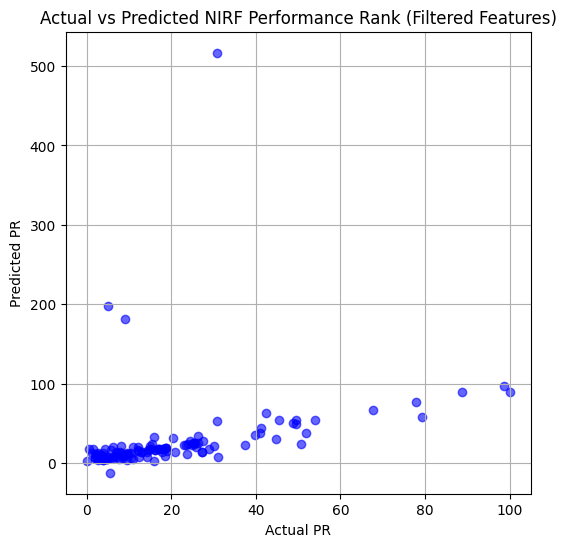

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, pred, alpha=0.6, color='blue')
plt.xlabel("Actual PR")
plt.ylabel("Predicted PR")
plt.title("Actual vs Predicted NIRF Performance Rank (Filtered Features)")
plt.grid(True)
plt.show()

In [10]:
import pandas as pd

data_path = "../data/processed/nirf_combined.csv"
df = pd.read_csv(data_path)

print("📄 Columns in dataset:")
print(df.columns.tolist())

📄 Columns in dataset:
['Institution Name', 'Institution Code', 'SS', 'FSR', 'FQE', 'FRU', 'OE', 'PU', 'QP', 'IPR', 'FPPP', 'GUE', 'GPHD', 'RD', 'WD', 'ESCS', 'PCS', 'PR', 'Year', 'Institute Name', 'Institute Code']


✅ Combined all years: (1102, 21)


/var/folders/03/d12ppvv967x43mxw8d91d2q80000gn/T/ipykernel_85471/496149502.py:47: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")



✅ Model trained successfully!
R² Score: 0.013865690366310135
MAE: 12.100733091472746


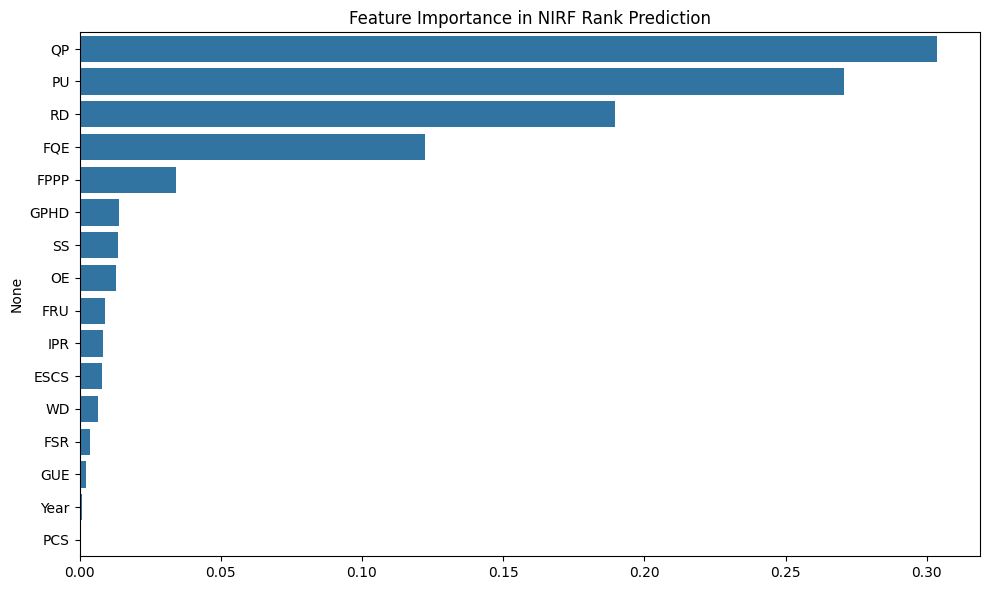

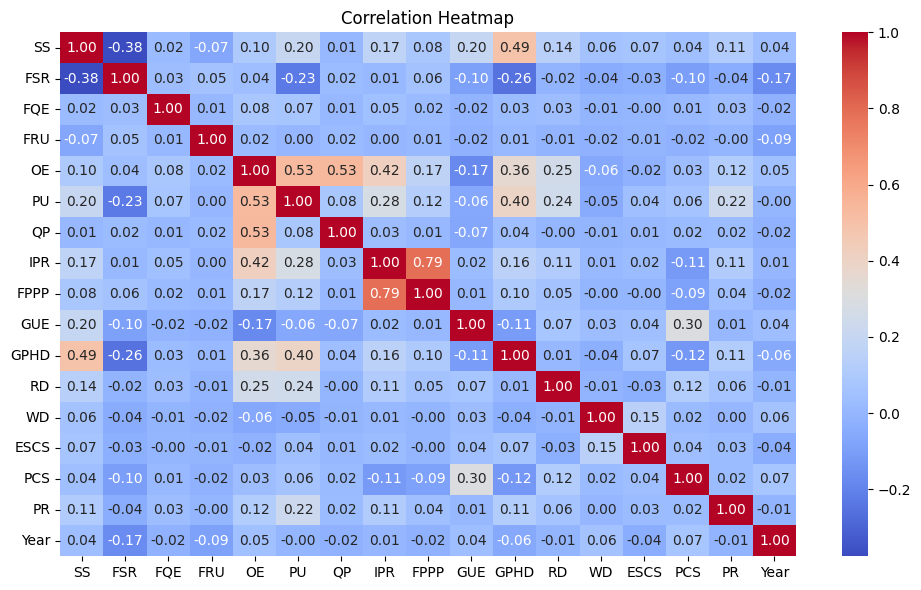


📊 Correlation with PR:
PR      1.000000
PU      0.222628
OE      0.117670
GPHD    0.114645
SS      0.111977
IPR     0.109662
RD      0.063442
FPPP    0.038098
FQE     0.029826
ESCS    0.026436
PCS     0.024454
QP      0.022232
GUE     0.009335
WD      0.001816
FRU    -0.003444
Year   -0.010733
FSR    -0.037907
Name: PR, dtype: float64


In [12]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------------
# 1️⃣ Load all CSV/XLSX files from data/raw
# ----------------------------------------------
raw_path = "../data/raw/"
all_data = []

for file in os.listdir(raw_path):
    path = os.path.join(raw_path, file)
    if file.endswith(".csv"):
        df = pd.read_csv(path)
    elif file.endswith(".xlsx"):
        df = pd.read_excel(path)
    else:
        continue

    # Extract year from filename
    year = ''.join([c for c in file if c.isdigit()]) or "unknown"
    df["Year"] = year
    all_data.append(df)

# Combine all years
df = pd.concat(all_data, ignore_index=True)
print(f"✅ Combined all years: {df.shape}")

# ----------------------------------------------
# 2️⃣ Clean Data
# ----------------------------------------------
# Drop unnecessary columns if they exist
drop_cols = ["Institution Name", "Institution Code", "Institute Name", "Institute Code"]
df = df.drop(columns=[c for c in drop_cols if c in df.columns], errors='ignore')

# Strip spaces in column names
df.columns = df.columns.str.strip()

# Convert all to numeric where possible
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="ignore")

# Ensure PR column exists and numeric
if "PR" not in df.columns:
    raise KeyError("❌ 'PR' column not found — check dataset column names again!")

df["PR"] = pd.to_numeric(df["PR"], errors="coerce")
df = df.dropna(subset=["PR"])

# ----------------------------------------------
# 3️⃣ Split data
# ----------------------------------------------
X = df.drop(columns=["PR"])
y = df["PR"]

# Select only numeric columns for training
X = X.select_dtypes(include=[np.number])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ----------------------------------------------
# 4️⃣ Train model
# ----------------------------------------------
model = RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("\n✅ Model trained successfully!")
print("R² Score:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))

# ----------------------------------------------
# 5️⃣ Analyze Feature Importance
# ----------------------------------------------
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index)
plt.title("Feature Importance in NIRF Rank Prediction")
plt.tight_layout()
plt.show()

# ----------------------------------------------
# 6️⃣ Visualize correlation
# ----------------------------------------------
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

print("\n📊 Correlation with PR:")
print(corr["PR"].sort_values(ascending=False))

In [12]:
import joblib

# Save model and scaler for later use
joblib.dump(model, "nirf_pr_model.pkl")
joblib.dump(scaler, "nirf_scaler.pkl")

print("✅ Model and Scaler saved successfully!")

✅ Model and Scaler saved successfully!


✅ Model, Scaler, and Data Loaded Successfully!
📊 Data Shape: (601, 21)
✅ Data Scaled Successfully!


/var/folders/03/d12ppvv967x43mxw8d91d2q80000gn/T/ipykernel_64278/2749388709.py:26: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col], errors="ignore")


✅ SHAP Values Computed Successfully!


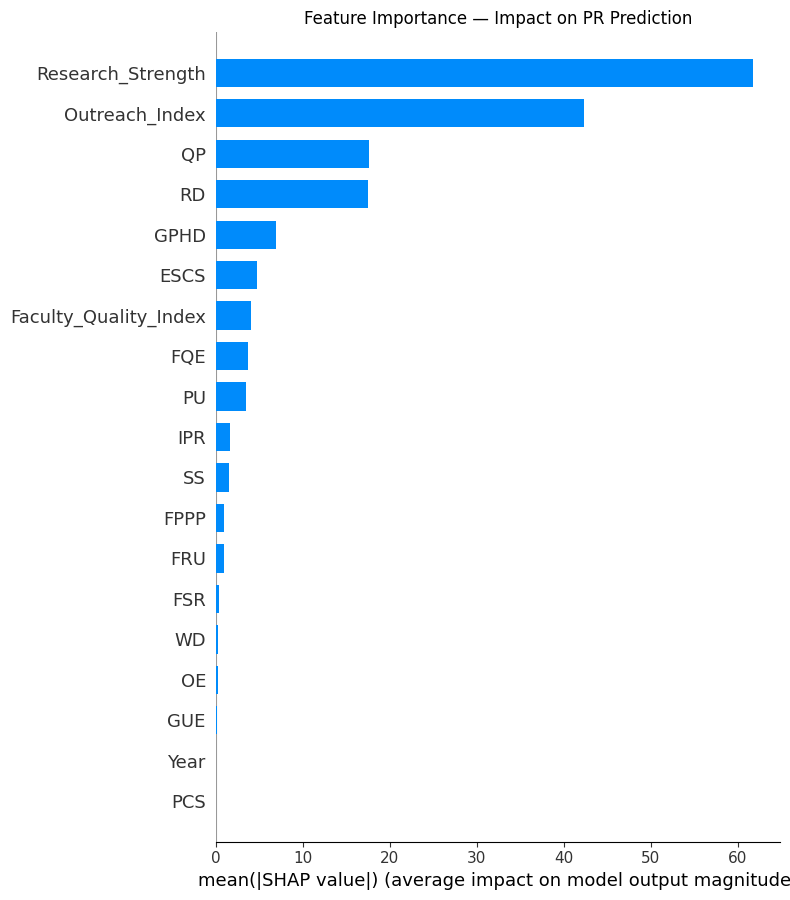

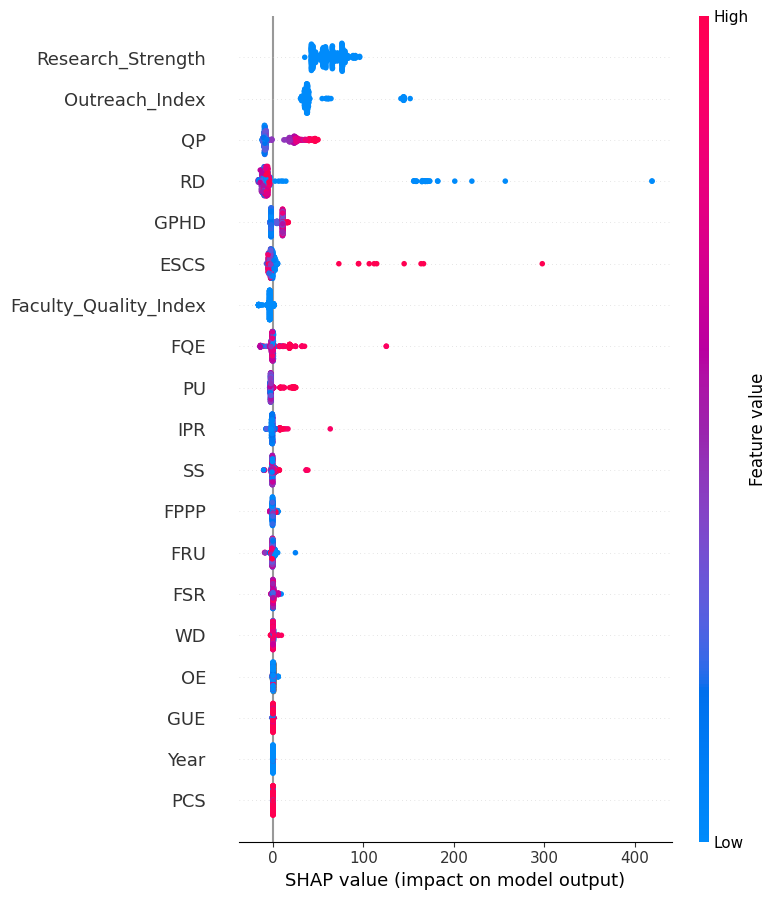

✅ SHAP Analysis Completed Successfully!


In [1]:
# ============================================================
# 🧠 SHAP Analysis for NIRF PR Model (Final Fixed)
# ============================================================

import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt

# ============================================================
# 1️⃣ Load Model, Scaler, and Data
# ============================================================
model = joblib.load("nirf_pr_model.pkl")
scaler = joblib.load("nirf_scaler.pkl")

data = pd.read_csv("/Users/shivanshpathak/Code/AIML/Mlops/data/processed/nirf_combined.csv")

print("✅ Model, Scaler, and Data Loaded Successfully!")
print("📊 Data Shape:", data.shape)

# ============================================================
# 2️⃣ Clean and Prepare Data
# ============================================================
data = data.replace(r"[^\d.\-]", "", regex=True)
for col in data.columns:
    data[col] = pd.to_numeric(data[col], errors="ignore")

# Drop unnecessary columns
data = data.drop(columns=["Institution Name", "Institution Code", "Institute Name", "Institute Code"], errors="ignore")

# Drop rows with missing PR values
data = data.dropna(subset=["PR"])

# Split features and target
X = data.drop(columns=["PR"])
y = data["PR"]

# --- handle missing columns if any ---
missing_features = ['Faculty_Quality_Index', 'Outreach_Index', 'Research_Strength']
for col in missing_features:
    if col not in X.columns:
        X[col] = 0

# ============================================================
# 3️⃣ Fix Column Order to Match Scaler Training
# ============================================================
# Safely use the scaler’s feature names if available, else fallback to model training columns
if hasattr(scaler, 'feature_names_in_'):
    correct_order = scaler.feature_names_in_
else:
    # fallback: manually define features used during training
    correct_order = ['SS', 'FSR', 'FQE', 'FRU', 'OE', 'PU', 'QP', 'IPR', 
                     'FPPP', 'GUE', 'GPHD', 'RD', 'WD', 'ESCS', 'PCS', 
                     'Faculty_Quality_Index', 'Outreach_Index', 'Research_Strength', 'Year']

# Reindex columns to match training order
X = X.reindex(columns=correct_order, fill_value=0)

# ============================================================
# 4️⃣ Scale and Run SHAP
# ============================================================
X_scaled = scaler.transform(X)
print("✅ Data Scaled Successfully!")

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_scaled)
print("✅ SHAP Values Computed Successfully!")

# ============================================================
# 5️⃣ Visualizations
# ============================================================
plt.title("Feature Importance — Impact on PR Prediction")
shap.summary_plot(shap_values, X, plot_type="bar")

shap.summary_plot(shap_values, X)
print("✅ SHAP Analysis Completed Successfully!")